In [38]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm

#pm.help()
pm.init(debug=True)
pm.info()
df_jo = pm.df('df_jo')
df_jo.info()

Lista de dataframes: ['cr', 'fe', 'cr_cp', 'fe_cp', 'df_jo']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_cr                       32094 non-null  int64         
 1   amount                      32094 non-null  float64       
 2   stat_cr                     32094 non-null  object        
 3   created_at                  32094 non-null  datetime64[ns]
 4   user_id                     32094 non-null  int64         
 5   moderated_at                21530 non-null  datetime64[ns]
 6   reimbursement_date          4061 non-null   datetime64[ns]
 7   cash_request_received_date  24149 non-null  datetime64[ns]
 8   money_back_date             17204 non-null  datetime64[ns]
 9   transfer_type               32094 non-null  object        
 10  send_at                     22370 non-null  datetime64[ns

In [39]:
# Filtrar las filas de fees con status "accepted"
#df_jo = df_jo[df_jo['stat_fe'] == 'accepted']
#df_jo = df_jo[df_jo['transfer_type'] == 'regular']

# Calcular las métricas mensuales
monthly_data = df_jo.groupby('Mes_created_at').agg(
    total_fees=('total_amount', 'sum'),
    total_adelantos=('amount', 'sum')
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100

# Mostrar la evolución mensual
print(monthly_data)

   Mes_created_at  total_fees  total_adelantos  fees_ratio
0         2019-11         0.0              1.0    0.000000
1         2019-12         0.0          27297.0    0.000000
2         2020-01         0.0          21587.0    0.000000
3         2020-02         0.0          16653.0    0.000000
4         2020-03         0.0          23549.0    0.000000
5         2020-04         5.0          46093.0    0.010848
6         2020-05      1285.0          94406.0    1.361142
7         2020-06      8725.0         344186.0    2.534967
8         2020-07     10395.0         436097.0    2.383644
9         2020-08     17565.0         446645.0    3.932653
10        2020-09     22935.0         503922.0    4.551300
11        2020-10     43815.0         709233.0    6.177801
12        2020-11       565.0          10710.0    5.275444


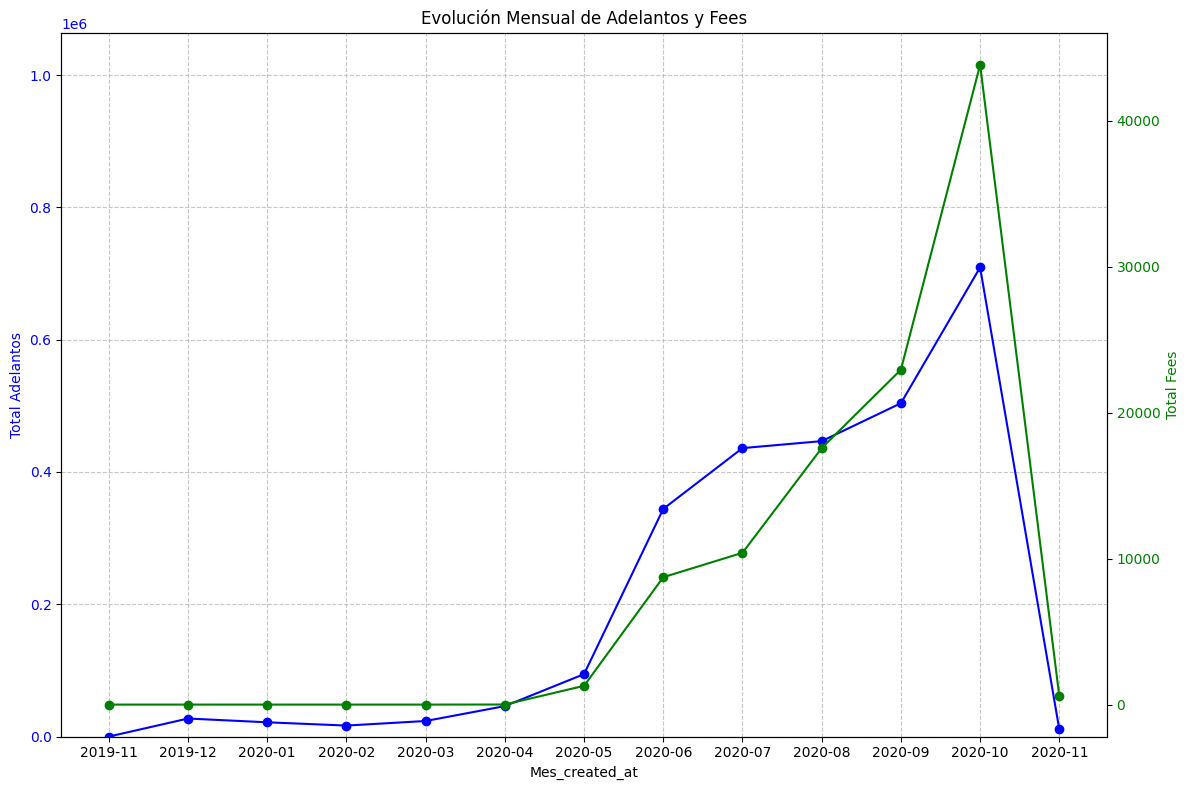

In [40]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje y principal para los adelantos
color_adelantos = 'blue'
ax1.set_xlabel('Mes_created_at')
ax1.set_ylabel('Total Adelantos', color=color_adelantos)
ax1.plot(monthly_data['Mes_created_at'].astype(str), monthly_data['total_adelantos'], marker='o', label='Total Adelantos', color=color_adelantos)
ax1.tick_params(axis='y', labelcolor=color_adelantos)

# Ajustar manualmente el rango del eje y para los adelantos
adelantos_max = monthly_data['total_adelantos'].max()
ax1.set_ylim(0, adelantos_max * 1.5)  # Ampliar el rango superior un 50%

# Crear un segundo eje y para los fees
ax2 = ax1.twinx()  # Crear un eje secundario que comparte el eje x
color_fees = 'green'
ax2.set_ylabel('Total Fees', color=color_fees)
ax2.plot(monthly_data['Mes_created_at'].astype(str), monthly_data['total_fees'], marker='o', label='Total Fees', color=color_fees)
ax2.tick_params(axis='y', labelcolor=color_fees)

# Título y ajustes finales
plt.title('Evolución Mensual de Adelantos y Fees')
plt.xticks(rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)
fig.tight_layout()  # Ajustar el diseño para evitar superposiciones

# Mostrar el gráfico
plt.show()


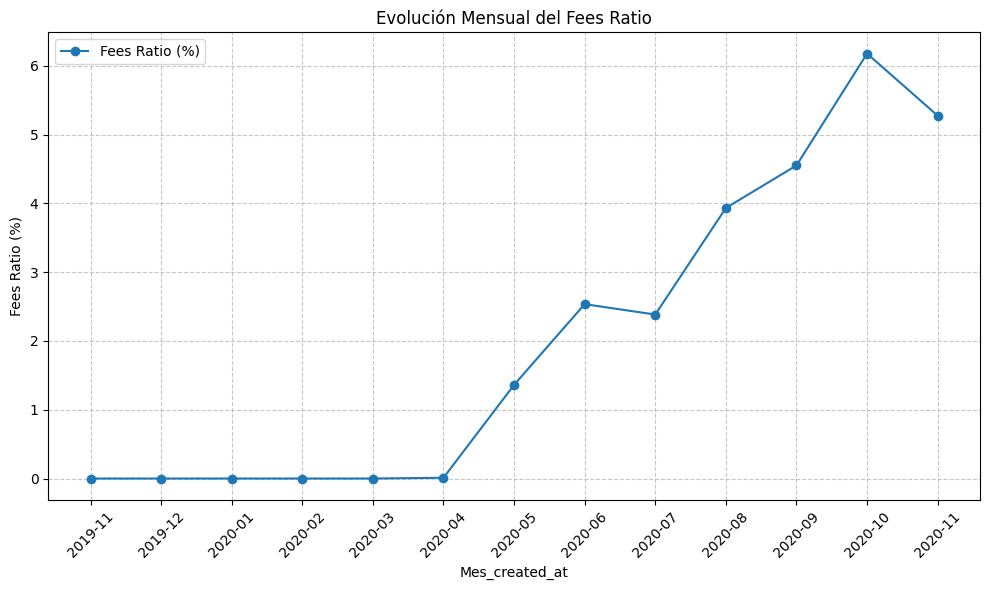

In [41]:
# Plotear la evolución del fees_ratio
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Mes_created_at'].astype(str), monthly_data['fees_ratio'], marker='o', label='Fees Ratio (%)')
plt.title('Evolución Mensual del Fees Ratio')
plt.xlabel('Mes_created_at')
plt.ylabel('Fees Ratio (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
df_jo['Cohorte'] = df_jo.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
#cr['Cohorte'] = cr.groupby('user_id')['created_at_notz'].transform('min').dt.to_period('M')
df_jo.head(10)

,id_cr,amount,stat_cr,created_at,user_id,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,...,type,stat_fe,category,total_amount,paid_at,from_date,to_date,charge_moment,active,Cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873,804,2019-12-11 16:47:42.405646,2020-01-09 19:05:21.596363,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780,231,2019-12-11 14:24:22.897988,2020-01-09 19:50:12.347780,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460,191,2019-12-11 09:46:59.777728,2020-01-09 19:13:35.825041,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172,761,2019-12-18 14:26:18.128407,2020-01-09 19:16:10.879606,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376,7686,2020-05-07 09:21:55.320193,NaT,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2020-05
5,2145,100.0,money_back,2020-05-23 20:58:55.129432,9489,2020-05-24 12:40:33.054910,NaT,2020-05-26,2020-07-06 03:36:03.023521,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2020-05
6,3512,100.0,rejected,2020-06-16 17:07:38.452652,14631,2020-06-17 10:21:21.360742,NaT,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2020-06
7,654,100.0,rejected,2020-02-10 01:11:53.808270,99309,2020-02-10 09:11:21.350695,2020-03-11 01:11:53.807930,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,0,2020-01
8,5672,100.0,canceled,2020-06-28 12:06:33.712840,992499,NaT,NaT,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,0,2020-06
9,71,90.0,rejected,2019-12-10 19:51:23.911206,897,2019-12-12 15:06:11.190299,2019-12-17 19:51:23.910748,NaT,NaT,regular,...,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,1,2019-12


In [71]:
# Calcular el número inicial de clientes únicos en cada cohorte
cohort_sizes_initial = df_jo.groupby('Cohorte').agg(
    Num_Clientes_Iniciales=('user_id', 'nunique'),  # Número de clientes únicos
    Num_Solicitudes=('id_cr', 'nunique'),  # Contar valores únicos de id_cr
    Solicitudes_Instant=('id_cr', lambda x: x[df_jo.loc[x.index, 'transfer_type'] == 'instant'].nunique()),  # Contar valores únicos con transfer_type 'instant'
    Solicitudes_Regular=('id_cr', lambda x: x[df_jo.loc[x.index, 'transfer_type'] == 'regular'].nunique()),  # Contar valores únicos con transfer_type 'regular'
    Clientes_con_fees=('user_id', lambda x: x[df_jo.loc[x.index, 'total_amount'] > 0].nunique()),  # Contar user_id únicos que han pagado fees
    CR=('amount', 'sum'),  # Sumar total_amount por cohorte
    Fees=('total_amount', 'sum')  # Sumar amount por cohorte
    
).reset_index()

# Calcular la métrica Fees/cash_request (total_amount / amount) y agregarla al DataFrame
cohort_sizes_initial['Fees_per_Cash_Request'] = (cohort_sizes_initial['Fees'] / cohort_sizes_initial['CR']) * 100

# Calcular LTV (Fees / Número de Clientes Iniciales)
cohort_sizes_initial['LTV'] = cohort_sizes_initial['Fees'] / cohort_sizes_initial['Num_Clientes_Iniciales']

cohort_sizes_initial


,Cohorte,Num_Clientes_Iniciales,Num_Solicitudes,Solicitudes_Instant,Solicitudes_Regular,Clientes_con_fees,CR,Fees,Fees_per_Cash_Request,LTV
0,2019-11,1,8,4,4,1,282.0,50.0,17.730496,50.000000
1,2019-12,256,1032,165,867,87,109521.0,1550.0,1.415254,6.054688
2,2020-01,108,355,60,295,35,40404.0,685.0,1.695377,6.342593
3,2020-02,93,442,85,357,46,49229.0,975.0,1.980540,10.483871
4,2020-03,91,372,79,293,47,43709.0,870.0,1.990437,9.560440
5,2020-04,250,944,201,743,127,111529.0,2510.0,2.250536,10.040000
6,2020-05,438,1617,476,1141,286,200240.0,5680.0,2.836596,12.968037
7,2020-06,1565,5281,1911,3370,1103,677943.0,22580.0,3.330663,14.428115
8,2020-07,1507,4169,2015,2154,981,491973.0,17195.0,3.495111,11.410086
9,2020-08,737,1631,1288,343,475,174920.0,7120.0,4.070432,9.660787
